## Flight Fare Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.
Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

## Data Overview 
### Here each data point corresponds to trip of flight from one city to another.

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price(target): The price of the ticket

#### Type of Machine Learning task :
It is an regression problem where given a set of features we need to predict the price of ticket from one city to another.

In [672]:
import sys
sys.version

'3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]'

In [799]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [1219]:
#reading the train dataset
flight_train = pd.read_excel('flight_Train.xlsx')
#reading the test dataset
flight_test = pd.read_excel('flight_Test.xlsx')

In [516]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [517]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## EDA 

In [801]:
flight_train.shape,flight_test.shape

((10683, 11), (2671, 10))

In [802]:
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [803]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [804]:
#checking the column
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [805]:
#checking the null values in a train dataset
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [806]:
#checking the null values in a test dataset
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [807]:
#flight_train = flight_train.dropna()
flight_train[flight_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [808]:
flight_train['Route'].mode()

0    DEL → BOM → COK
dtype: object

In [809]:
flight_train['Total_Stops'].mode()

0    1 stop
dtype: object

In [1220]:
#inserting the most repeated route column value in null valued row
flight_train.loc[9039,'Route']='DEL → BOM → COK'
flight_train.loc[9039,'Total_Stops']='1 stop'

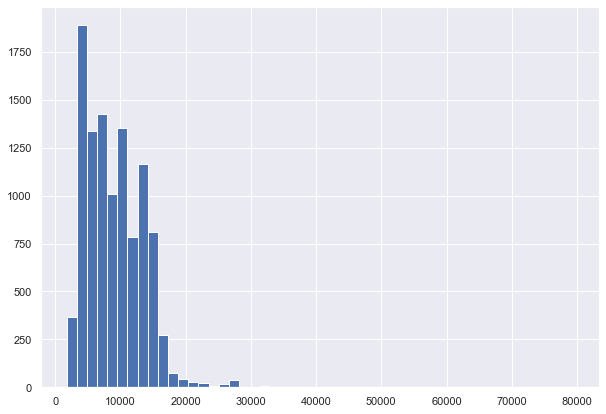

In [811]:
plt.hist(flight_train['Price'],bins=50)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

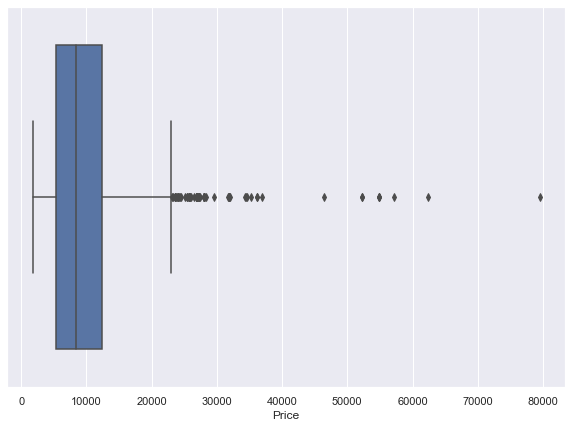

In [529]:
sns.boxplot(flight_train['Price'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be flight ticket price for some particular variables.

In [530]:
flight_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [531]:
flight_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

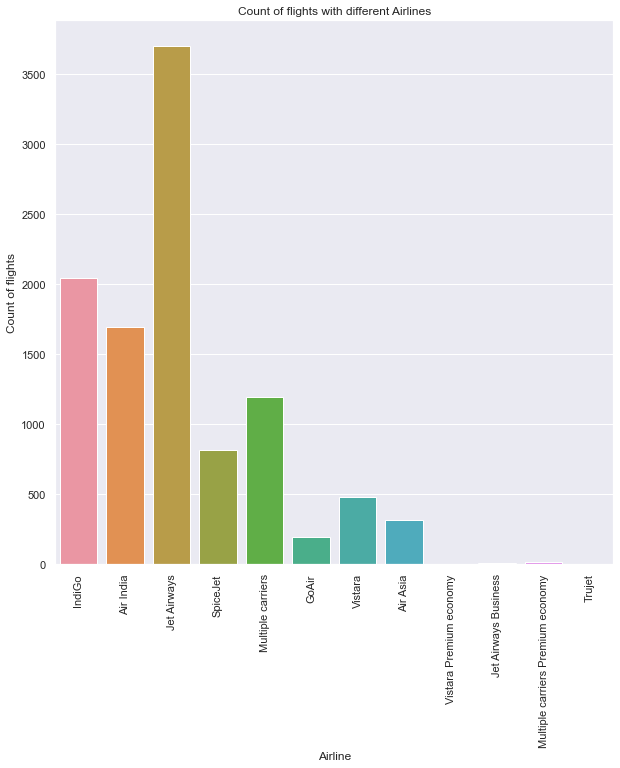

In [753]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = flight_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
plt.show()

There are more number of flights of Jet Airways. 

Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

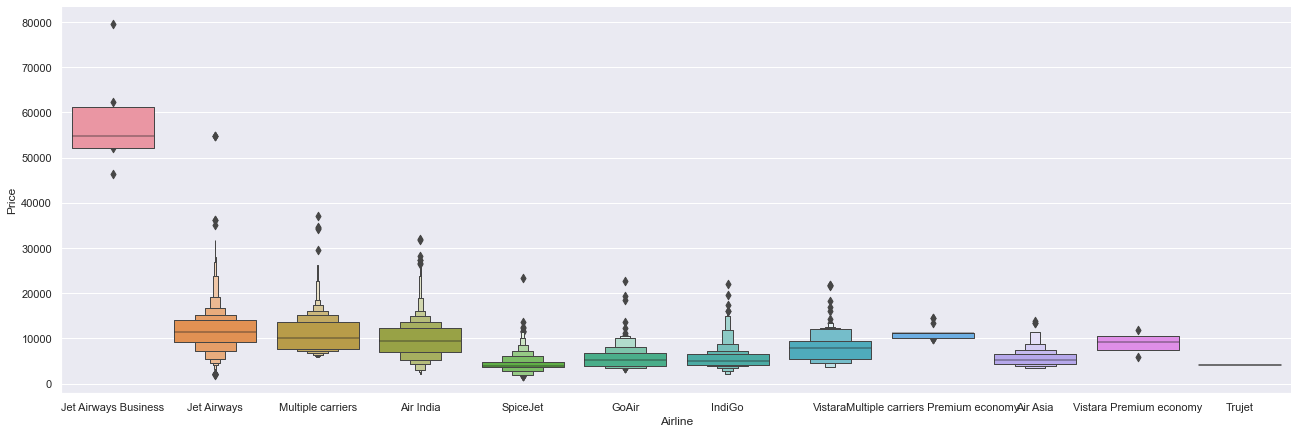

In [533]:

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = flight_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

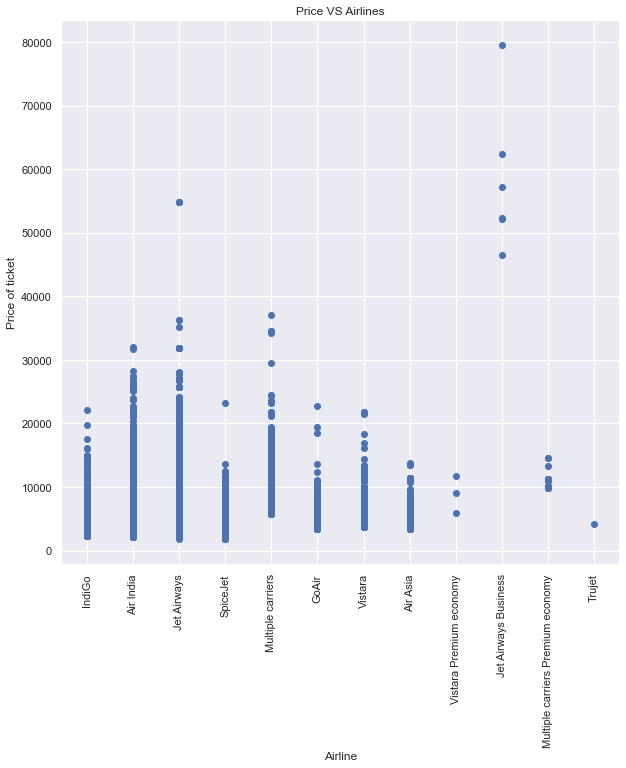

In [751]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(flight_train['Airline'], flight_train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
plt.show()

The ticket rate for Jet Airways Business airline is high.

In [754]:
flight_train['Source'].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: Source, dtype: int64

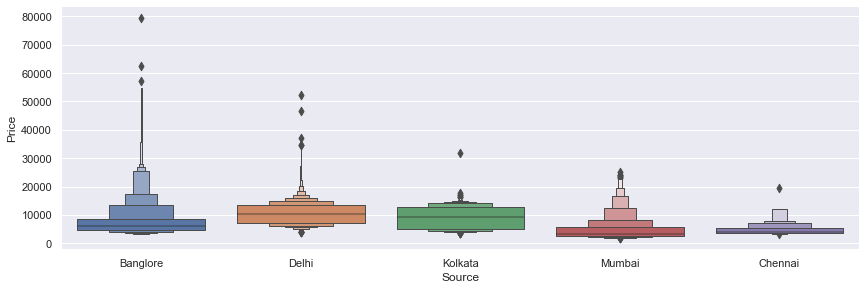

In [534]:
sns.catplot(y = "Price", x = "Source", data = flight_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [535]:
flight_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [536]:
pd.crosstab(flight_train['Source'],flight_train['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1265,0,0,932
Chennai,0,0,0,0,381,0
Delhi,0,4537,0,0,0,0
Kolkata,2871,0,0,0,0,0
Mumbai,0,0,0,697,0,0


#### As you can see that more number of flights is between delhi to cochi. So this may be the busiest route 

In [537]:
#row of the entire dataset where the price is maximum
flight_train.loc[flight_train['Price'].idxmax()]

Airline            Jet Airways Business
Date_of_Journey              01/03/2019
Source                         Banglore
Destination                   New Delhi
Route                   BLR → BOM → DEL
Dep_Time                          05:45
Arrival_Time                      11:25
Duration                         5h 40m
Total_Stops                      1 stop
Additional_Info          Business class
Price                             79512
Name: 2924, dtype: object

In [538]:
#row of the entire dataset where the price is miniimum
flight_train.loc[flight_train['Price'].idxmin()]

Airline                SpiceJet
Date_of_Journey      21/03/2019
Source                   Mumbai
Destination           Hyderabad
Route                 BOM → HYD
Dep_Time                  22:45
Arrival_Time       00:10 22 Mar
Duration                 1h 25m
Total_Stops            non-stop
Additional_Info         No info
Price                      1759
Name: 4066, dtype: object

In [539]:
flight_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

#### Handling the Typos

In [540]:
flight_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

#### 'No info' is same as 'No Info'. So replacing them with single common label

In [1221]:
flight_train['Additional_Info'].replace('No Info', 'No info', inplace = True)

In [896]:
flight_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [897]:
flight_train['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

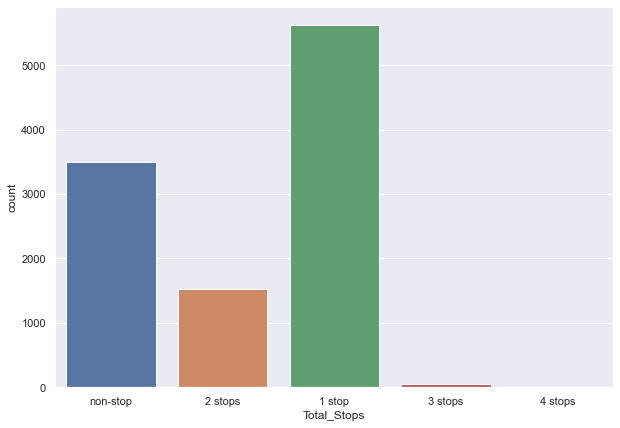

In [898]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(flight_train['Total_Stops'])
#there are more flights which have 1 stops

In [899]:
#stats of airlines with total stops
pd.crosstab(flight_train['Airline'],flight_train['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,4 stops,non-stop
Airline,,,,,
Air Asia,129,9,0,0,181
Air India,541,756,37,1,417
GoAir,102,0,0,0,92
IndiGo,793,19,0,0,1241
Jet Airways,2535,691,0,0,623
Jet Airways Business,4,2,0,0,0
Multiple carriers,1145,43,8,0,0
Multiple carriers Premium economy,13,0,0,0,0
SpiceJet,148,0,0,0,670


### Feature engineering

In [546]:
# a=pd.DatetimeIndex(flight_train['Date_of_Journey']).year
# a.value_counts()

In [547]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [1222]:
#extracting the month from the flight date
flight_train['Date_of_Journey'] = pd.to_datetime(flight_train['Date_of_Journey'])
flight_train['Month_of_Journey'] = flight_train['Date_of_Journey'].dt.month
flight_train['Day_of_Journey'] = flight_train['Date_of_Journey'].dt.day

In [1223]:
flight_train['Month_of_Journey'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month_of_Journey, dtype: int64

#### most of the people are travelling in the month of june

In [1224]:
flight_train['Day_of_Journey'].value_counts()

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: Day_of_Journey, dtype: int64

In [1225]:
#extracting the month from the flight date
flight_test['Date_of_Journey'] = pd.to_datetime(flight_test['Date_of_Journey'])
flight_test['Month_of_Journey'] = flight_test['Date_of_Journey'].dt.month
flight_test['Day_of_Journey'] = flight_test['Date_of_Journey'].dt.day

In [1226]:
flight_train.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
Month_of_Journey             int64
Day_of_Journey               int64
dtype: object

In [1227]:
flight_train['Duration'].value_counts().head(10)

2h 50m    550
1h 30m    386
2h 55m    337
2h 45m    337
2h 35m    329
3h        261
2h 20m    238
2h 30m    220
2h 40m    158
2h 15m    135
Name: Duration, dtype: int64

In [1228]:
# duration = list(flight_train['Duration'])

# for i in range(len(duration)) :
#     if len(duration[i].split()) != 2:
#         if 'h' in duration[i] :
#             duration[i] = duration[i].strip() + ' 0m'
#         elif 'm' in duration[i] :
#             duration[i] = '0h {}'.format(duration[i].strip())

# print(duration)

In [1229]:
#preproceesing the duration
duration = list(flight_train['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_train['Duration_hours'] = dur_hours
flight_train['Duration_minutes'] =dur_minutes


In [1230]:
flight_train['Duration_minutes'].value_counts()

30    1446
0     1031
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     637
5      624
10     525
Name: Duration_minutes, dtype: int64

In [1231]:
#for test dataset
duration = list(flight_test['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
flight_test['Duration_hours'] = dur_hours
flight_test['Duration_minutes'] =dur_minutes


In [1232]:
#droping the duration column in train dataset
flight_train = flight_train.drop(labels='Duration',axis=1)

In [1233]:
#droping the duration column in test dataset
flight_test = flight_test.drop(labels='Duration',axis=1)

In [1234]:
#featuring the departure_time and arrival_time
flight_train['Dep_Time'] = pd.to_datetime(flight_train['Dep_Time'])
flight_train['Arrival_Time'] = pd.to_datetime(flight_train['Arrival_Time'])
flight_train['Dep_Time_hours'] = flight_train['Dep_Time'].dt.hour
flight_train['Dep_Time_minutes'] = flight_train['Dep_Time'].dt.minute
flight_train['Arr_Time_hours'] = flight_train['Arrival_Time'].dt.hour
flight_train['Arr_Time_minutes'] = flight_train['Arrival_Time'].dt.minute

In [1235]:
#featuring the departure_time and arrival_time
flight_test['Dep_Time'] = pd.to_datetime(flight_test['Dep_Time'])
flight_test['Arrival_Time'] = pd.to_datetime(flight_test['Arrival_Time'])
flight_test['Dep_Time_hours'] = flight_test['Dep_Time'].dt.hour
flight_test['Dep_Time_minutes'] = flight_test['Dep_Time'].dt.minute
flight_test['Arr_Time_hours'] = flight_test['Arrival_Time'].dt.hour
flight_test['Arr_Time_minutes'] = flight_test['Arrival_Time'].dt.minute

In [1236]:
#dropping the orginal columns
flight_train = flight_train.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [1237]:
flight_test = flight_test.drop(labels={'Dep_Time','Arrival_Time'},axis=1)

In [1238]:
flight_train['Price'].groupby(flight_train['Total_Stops']).mean()
#as you can see that 4 stops flights has more price in mean terms

Total_Stops
1 stop      10593.570032
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
non-stop     5024.900315
Name: Price, dtype: float64

In [1239]:
#extracting the weekday name 
flight_train['Date_of_journey_weekname'] = flight_train['Date_of_Journey'].dt.weekday
flight_train['Is_weekend'] = np.where(flight_train['Date_of_journey_weekname'].isin(['6','0']),1,0)

In [1240]:
flight_train['Is_weekend'].head(10)

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Is_weekend, dtype: int32

In [1241]:
flight_train['Date_of_journey_weekname'].head(10)

0    6
1    5
2    4
3    3
4    3
5    0
6    1
7    3
8    1
9    0
Name: Date_of_journey_weekname, dtype: int64

In [1242]:
flight_train['Is_weekend'].value_counts()

0    8130
1    2553
Name: Is_weekend, dtype: int64

In [1243]:
#for test dataset
flight_test['Date_of_journey_weekname'] = flight_test['Date_of_Journey'].dt.weekday
flight_test['Is_weekend'] = np.where(flight_test['Date_of_journey_weekname'].isin(['6','0']),1,0)

In [1244]:
flight_test['Is_weekend'].head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: Is_weekend, dtype: int32

In [1245]:
flight_test['Is_weekend'].value_counts()

0    2028
1     643
Name: Is_weekend, dtype: int64

In [1246]:
#dropping the date of journey column in train data
flight_train = flight_train.drop(labels='Date_of_Journey',axis=1)

In [1247]:
#dropping the date of journey column in test data
flight_test = flight_test.drop(labels='Date_of_Journey',axis=1)

In [1248]:
flight_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [1249]:
flight_train['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [1250]:
# flight_train.head()

In [1251]:
# flight_test.head()

In [1252]:
flight_train_orginal = flight_train.copy()
flight_test_orginal  = flight_test.copy()

In [1253]:
flight_train = flight_train_orginal.copy()
flight_test  = flight_test_orginal.copy()

In [1254]:
flight_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
flight_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

#### Dropping Duplicates

In [1056]:
# flight_train = flight_train.drop_duplicates()
# flight_train.shape

(10461, 17)

### Train & Test Split

In [1255]:
flight_train.iloc[:,6]

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [1256]:
#dependent varaible
# Y_Train = flight_train.iloc[:,6].values
Y=flight_train.iloc[:,6].values

In [1257]:
#independent varaibles
# X_Train = flight_train.iloc[:,flight_train.columns!='Price'].values
X=flight_train.iloc[:,flight_train.columns!='Price'].values

In [1258]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [1259]:
X_Train.shape

(8546, 16)

In [1130]:
# X_Test = flight_test.iloc[:,:].values
# X_Test.shape

In [1107]:
flight_train_orginal.shape

(10683, 17)

In [1108]:
# flight_train.head()

## Encoding

In [858]:
# flight_train.head()

In [1260]:
#using the label encoder
le1 = LabelEncoder()
le2 = LabelEncoder()

### encoding the categorical columns of the dataset 

In [1261]:
X_Train[:,3] = le1.fit_transform(X_Train[:,3])

In [1262]:
X_Train[:,0] = le1.fit_transform(X_Train[:,0])

X_Train[:,1] = le1.fit_transform(X_Train[:,1])

X_Train[:,2] = le1.fit_transform(X_Train[:,2])

# X_Train[:,3] = le1.fit_transform(X_Train[:,3])

# X_Train[:,4] = le1.fit_transform(X_Train[:,4])

X_Train[:,5] = le1.fit_transform(X_Train[:,5])

In [1263]:
pd.DataFrame(X_Train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4,4,3,55,2,7,12,3,10,5,6,30,16,35,1,0
1,4,2,1,101,1,5,9,5,25,5,11,30,12,35,3,0
2,8,2,1,118,1,7,4,24,6,20,15,45,22,5,2,0
3,6,2,1,101,1,7,3,21,12,45,12,50,1,35,3,0
4,1,2,1,107,2,7,6,24,26,0,17,15,19,15,0,1


## encoding fot test data

In [1264]:
X_Test[:,0] = le2.fit_transform(X_Test[:,0])

X_Test[:,1] = le2.fit_transform(X_Test[:,1])

X_Test[:,2] = le2.fit_transform(X_Test[:,2])

X_Test[:,3] = le2.fit_transform(X_Test[:,3])

#X_Test[:,4] = le2.fit_transform(X_Test[:,4])

X_Test[:,5] = le2.fit_transform(X_Test[:,5])

In [1265]:
len(X_Test)

2137

In [1266]:
pd.DataFrame(X_Test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4,3,0,37,1,2,5,18,12,30,5,45,18,15,5,0
1,2,2,1,68,1,4,3,6,9,0,10,35,19,35,2,0
2,4,3,0,37,1,4,1,5,5,45,14,5,19,50,5,0
3,3,1,4,89,0,4,5,24,2,20,14,45,17,5,4,0
4,4,2,1,68,1,2,5,21,5,35,22,50,4,25,1,0


### Feature Selection
##### Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap
2. feature_importance_
3. SelectKBest

In [1139]:
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Duration_hours', 'Duration_minutes', 'Dep_Time_hours',
       'Dep_Time_minutes', 'Arr_Time_hours', 'Arr_Time_minutes',
       'Date_of_journey_weekname', 'Is_weekend'],
      dtype='object')

In [1140]:
flight_train.shape

(10683, 17)

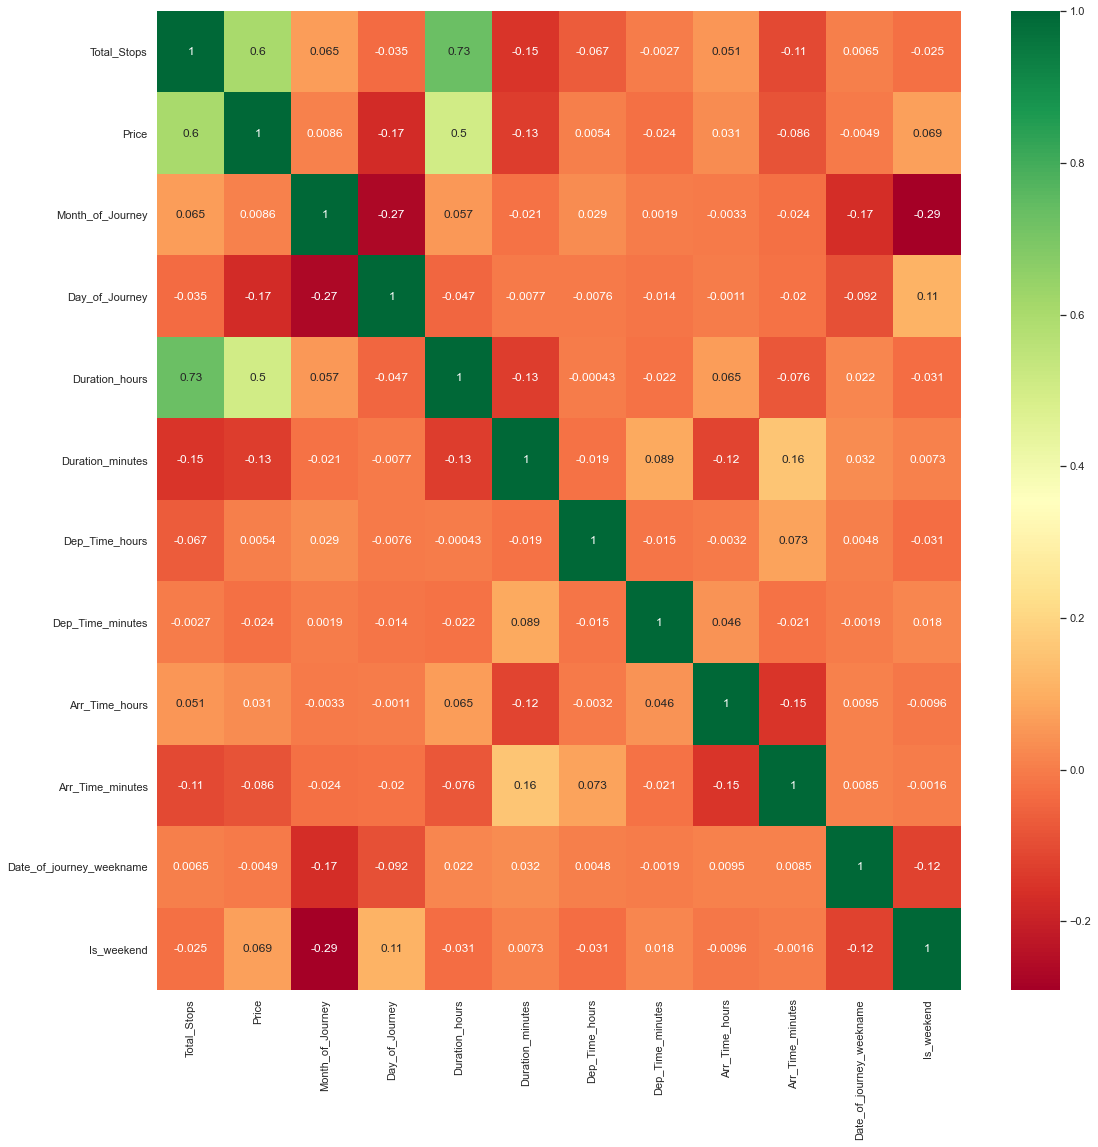

In [867]:
# Finds correlation between Independent and dependent attributes


plt.figure(figsize = (18,18))
sns.heatmap(flight_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [946]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_Train, Y_Train)

ExtraTreesRegressor()

In [947]:
print(selection.feature_importances_)

[0.13765726 0.01354043 0.0271596  0.05598988 0.26830151 0.05971941
 0.05920281 0.07983228 0.14783187 0.01555398 0.02305582 0.01961111
 0.02912109 0.01769178 0.02632957 0.01940159]


In [948]:
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Duration_hours', 'Duration_minutes', 'Dep_Time_hours',
       'Dep_Time_minutes', 'Arr_Time_hours', 'Arr_Time_minutes',
       'Date_of_journey_weekname', 'Is_weekend'],
      dtype='object')

In [949]:
X = (['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info',  'Month_of_Journey', 'Day_of_Journey',
       'Duration_hours', 'Duration_minutes', 'Dep_Time_hours',
       'Dep_Time_minutes', 'Arr_Time_hours', 'Arr_Time_minutes',
       'Date_of_journey_weekname', 'Is_weekend'])

In [950]:
feat_importances=pd.Series(selection.feature_importances_, index=X)
feat_importances.sort_values(ascending=False)

Total_Stops                 0.268302
Duration_hours              0.147832
Airline                     0.137657
Day_of_Journey              0.079832
Additional_Info             0.059719
Month_of_Journey            0.059203
Route                       0.055990
Arr_Time_hours              0.029121
Destination                 0.027160
Date_of_journey_weekname    0.026330
Dep_Time_hours              0.023056
Dep_Time_minutes            0.019611
Is_weekend                  0.019402
Arr_Time_minutes            0.017692
Duration_minutes            0.015554
Source                      0.013540
dtype: float64

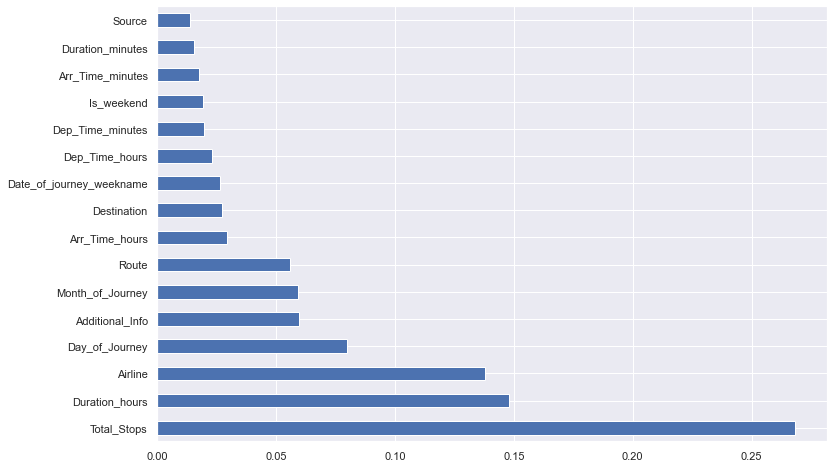

In [951]:

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [874]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [875]:
mutual_info = mutual_info_classif(X_Train, Y_Train)
mutual_info

array([2.72577467, 2.57517179, 2.57553833, 3.51068013, 2.3418055 ,
       1.70354308, 0.79214696, 1.07895388, 1.80906921, 1.07345011,
       1.3949504 , 1.2179068 , 1.82484434, 1.52283531, 0.76920903,
       0.38873007])

In [876]:
sel_ten_col=SelectKBest(mutual_info_classif, k=10)
sel_ten_col.fit(X_Train,Y_Train)


SelectKBest(score_func=<function mutual_info_classif at 0x000002AB8A86CEE8>)

In [877]:
pd.DataFrame(X_Train).columns[sel_ten_col.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 8, 10, 12, 13], dtype='int64')

## Scaling using standard scaler

In [1203]:
sc = StandardScaler()

In [1204]:
X_Train = sc.fit_transform(X_Train)

In [1205]:
X_Test = sc.transform(X_Test)

In [1206]:
len(X_Test)

2137

In [1207]:
Y_Train = Y_Train.reshape((len(Y_Train)),1)

In [1208]:
Y_Train = sc.fit_transform(Y_Train)

In [1209]:
# To change to 2-Dim array

Y_Train = Y_Train.ravel()

In [1210]:
pd.DataFrame(X_Train).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.013812,1.736591,1.050856,-0.485559,1.744328,0.494778,2.175159,-1.108603,-0.023853,-1.373356,-1.130391,0.298051,0.385320,0.626263,-1.032537,-0.562125
1,0.013812,0.043390,-0.297686,0.802212,0.262221,-1.912495,1.166591,-0.881561,1.745657,-1.373356,-0.259527,0.298051,-0.197270,0.626263,0.055577,-0.562125
2,1.712135,0.043390,-0.297686,1.278127,0.262221,0.494778,-0.514354,1.275338,-0.495722,-0.492134,0.437165,1.098872,1.259207,-1.193541,-0.488480,-0.562125
3,0.862973,0.043390,-0.297686,0.802212,0.262221,0.494778,-0.850544,0.934775,0.212082,0.976569,-0.085354,1.365812,-1.799395,0.626263,0.055577,-0.562125
4,-1.259931,0.043390,-0.297686,0.970182,1.744328,0.494778,0.158024,1.275338,1.863624,-1.667096,0.785510,-0.502770,0.822264,-0.586940,-1.576594,1.778965
5,1.712135,0.889991,-0.971957,-0.317589,-1.219885,0.494778,1.166591,-0.995082,-0.967591,0.095347,0.785510,-0.769710,0.822264,0.929564,-0.488480,-0.562125
6,2.561297,-1.649811,0.376585,-1.521376,-1.219885,0.494778,-0.850544,-0.995082,-0.967591,1.270309,-0.607873,1.098872,-0.197270,0.626263,-1.576594,1.778965
7,-0.410769,0.889991,-0.971957,-0.317589,-1.219885,0.494778,0.158024,0.253649,-0.967591,0.389088,1.656375,-0.502770,-1.945043,1.536165,1.143691,-0.562125
8,-0.410769,1.736591,1.050856,-0.709520,-1.219885,0.494778,1.166591,-0.768040,-1.085559,0.095347,-1.130391,0.031111,-0.925509,1.839466,0.599634,-0.562125
9,1.712135,0.889991,-0.971957,-0.317589,-1.219885,0.494778,-1.522922,-1.108603,-0.967591,0.095347,0.785510,-0.502770,0.822264,1.232864,0.055577,-0.562125


In [1211]:
pd.DataFrame(Y_Train).head()

,0
0,3.132639
1,0.714859
2,-0.756833
3,-0.299069
4,0.627945


## Model Selection

### KNN Regressor

In [1267]:
from sklearn.neighbors import KNeighborsRegressor
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_Train, Y_Train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [1268]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(n_neighbors=3)


{'n_neighbors': 3}

In [1269]:
Y_Train_pred =knn_regressor.predict(X_Train) ##Predict train result
Y_Test_pred =knn_regressor.predict(X_Test) ##Predict test result

In [1270]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(Y_Train, Y_Train_pred)))
print("R-squared: ", r2_score(Y_Train, Y_Train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1857.9732729150273
R-squared:  0.8378289790135272


In [1271]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(Y_Test, Y_Test_pred)))
print("R-squared: ", r2_score(Y_Test, Y_Test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  4277.652102303907
R-squared:  0.13540271893253852


## Random Forest Regressor

In [1272]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_Train, Y_Train)

RandomForestRegressor()

In [1273]:
y_pred = reg_rf.predict(X_Test)

In [1274]:
reg_rf.score(X_Train, Y_Train)

0.9813671164465838

In [1275]:
reg_rf.score(X_Test, Y_Test)

0.6452711606812933

In [1305]:
Y_Train_pred =reg_rf.predict(X_Train) ##Predict train result
Y_Test_pred =reg_rf.predict(X_Test) ##Predict test result

In [1308]:
print("Train Results for Random Forest Regressor Model:")
print(48 * '-')
print("Root mean squared error: ", sqrt(mse(Y_Train, Y_Train_pred)))
print("R-squared: ", r2_score(Y_Train, Y_Train_pred))

Train Results for Random Forest Regressor Model:
------------------------------------------------
Root mean squared error:  629.7858109940266
R-squared:  0.9813671164465838


In [1309]:
print("Test Results for Random Forest Regressor Model:")
print(48 * '-')
print("Root mean squared error: ", sqrt(mse(Y_Test, Y_Test_pred)))
print("R-squared: ", r2_score(Y_Test, Y_Test_pred))

Test Results for Random Forest Regressor Model:
------------------------------------------------
Root mean squared error:  2739.9761156462473
R-squared:  0.6452711606812933


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


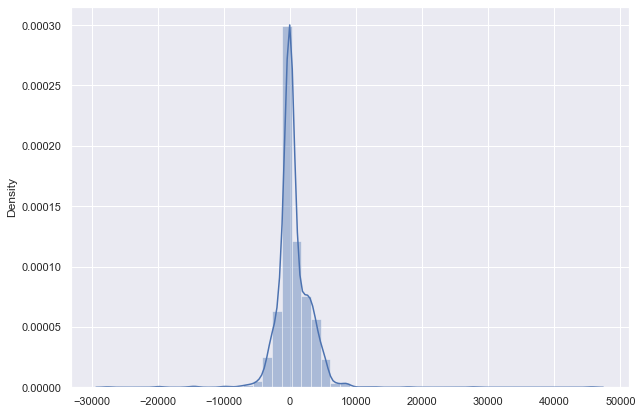

In [1281]:
sns.distplot(Y_Test-y_pred)
plt.show()

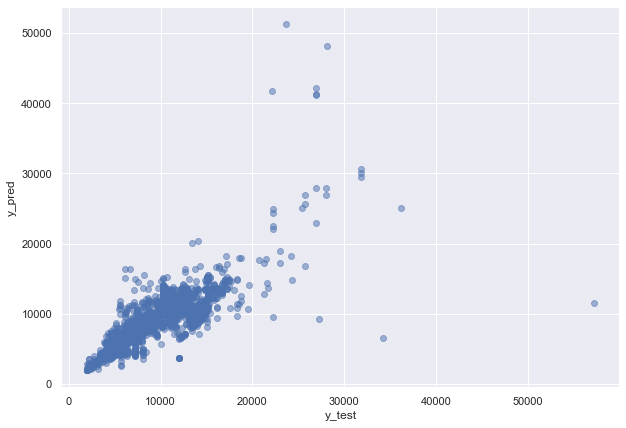

In [1282]:
plt.scatter(Y_Test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Using randm forest regression - Hyperparameter Optimization

In [1283]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [1284]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [1285]:
rf =RandomForestRegressor()

### Random Forest with Randomized Search OPT

In [1286]:
best_rf_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='neg_mean_squared_error')

In [1287]:
best_rf_tree.fit(X_Train,Y_Train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [1288]:
best_rf_tree.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [1310]:
Y_Train_pred =best_rf_tree.predict(X_Train) ##Predict train result
Y_Test_pred =best_rf_tree.predict(X_Test) ##Predict test result

In [1311]:
print("Train Results for Random Forest Regressor Model with Random Search OPT:")
print(70 * '-')
print("Root mean squared error: ", sqrt(mse(Y_Train, Y_Train_pred)))
print("R-squared: ", r2_score(Y_Train, Y_Train_pred))

Train Results for Random Forest Regressor Model with Random Search OPT:
----------------------------------------------------------------------
Root mean squared error:  1259.4837081892717
R-squared:  0.9254788695164949


In [1312]:
print("Test Results for Random Forest Regressor Model with Random Search OPT:")
print(70 * '-')
print("Root mean squared error: ", sqrt(mse(Y_Test, Y_Test_pred)))
print("R-squared: ", r2_score(Y_Test, Y_Test_pred))

Test Results for Random Forest Regressor Model with Random Search OPT:
----------------------------------------------------------------------
Root mean squared error:  2674.345921365215
R-squared:  0.6620611614899445


In [1292]:
prediction = best_rf_tree.predict(X_Test)

In [1293]:
prediction

array([10771.19652459,  6860.50442051, 10082.19457373, ...,
        7518.41583097,  4414.29523598,  9153.80808607])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


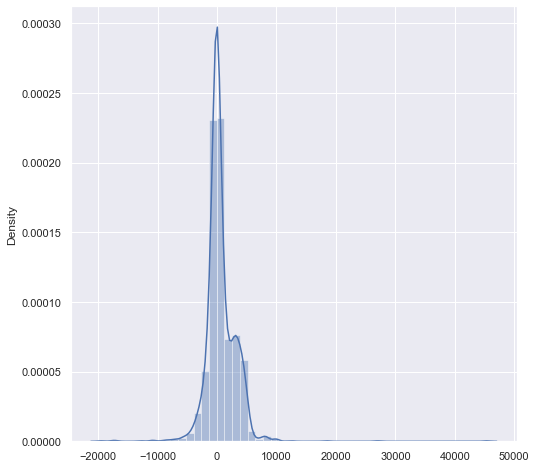

In [1294]:
plt.figure(figsize = (8,8))
sns.distplot(Y_Test-prediction)
plt.show()

In [1295]:
print('MAE:', metrics.mean_absolute_error(Y_Test, prediction))
print('MSE:', metrics.mean_squared_error(Y_Test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_Test, prediction)))
print("R-squared: ", r2_score(Y_Test, prediction))

MAE: 1606.9966717050827
MSE: 7152126.107122759
RMSE: 2674.345921365215
R-squared:  0.6620611614899445


## XGBoost Regressor

In [1296]:
import xgboost
from xgboost.sklearn import XGBRegressor

In [1297]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
min_child_width = [i for i in range(1,6,2)]
gamma = [i/10.0 for i in range(0,5)]
subsample = [i/10.0 for i in range(6,10)]
colsample_bytree=[i/10.0 for i in range(6,10)]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [1298]:
random_grid = {'n_estimators': n_estimators,
               
              'min_child_weight':min_child_width,
              'gamma':gamma,
               'subsample':subsample,
               'colsample_bytree':colsample_bytree,
               'reg_alpha':reg_alpha,
               'learning_rate': learning_rate
              }

In [1299]:
XG = XGBRegressor()

In [1300]:
XG_random = RandomizedSearchCV(estimator=XG,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [1301]:
XG_random.fit(X_Train,Y_Train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


[11:54:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                                        

In [1313]:
print(XG_random.best_estimator_)
XG_random.best_params_

XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.3,
             n_estimators=1000, reg_alpha=1e-05, subsample=0.9)


{'subsample': 0.9,
 'reg_alpha': 1e-05,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.6}

In [1314]:
xg_predict = XG_random.predict(X_Test)

In [1315]:
Y_Train_pred =XG_random.predict(X_Train) ##Predict train result
Y_Test_pred =XG_random.predict(X_Test) ##Predict test result

In [1323]:
print("Train Results for XGBoost Regressor:")
print(36 * '-')
print("Root mean squared error: ", sqrt(mse(Y_Train, Y_Train_pred)))
print("R-squared: ", r2_score(Y_Train, Y_Train_pred))

Train Results for XGBoost Regressor:
------------------------------------
Root mean squared error:  980.870034899362
R-squared:  0.9548022036768821


In [1320]:
XG_random.best_score_

0.8770821855478612

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


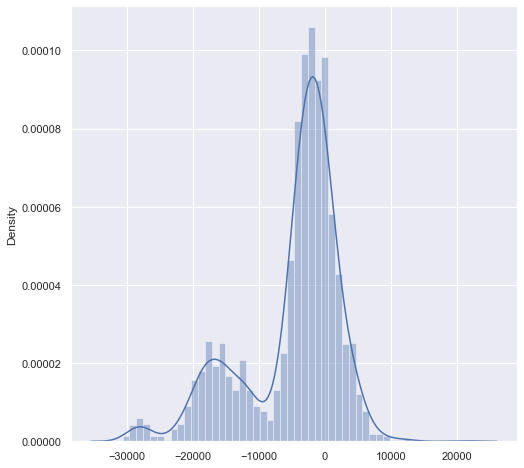

In [1321]:
plt.figure(figsize = (8,8))
sns.distplot(Y_Test-y_test_pred)
plt.show()